## Discrete Time Signals and Z-Transform
---

- [1. Useful Mathemical Relations](#Useful-Mathemical-Relations)
- [2. Sampling of Continuous Time Signals](#Sampling-of-Continuous-Time-Signals)
- [3. The Discrete Time Fourier Transform (DTFT)](#The-Discrete-Time-Fourier-Transform-(DTFT))
- [4. The $Z$-Transform and the $z$-Plane](#The-$Z$-Transform-and-the-$z$-Plane)
- [5. Properties of the $Z$-Transform, Comparison of $s$-plane and $z$-plane](#Properties-of-the-$Z$-Transform,-Comparison-of-$s$-plane-and-$z$-plane)
- [6. Description of Discrete Time Systems](#Description-of-Discrete-Time-Systems)
- [7. Stability of a Discrete Time System](#Stability-of-a-Discrete-Time-System)
- [8. Transfer Function and Frequency Response](#Transfer-Function-and-Frequency-Response)
- [9. Introduction to Scipy dlti](#Introduction-to-Scipy-dlti)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Useful Mathemical Relations
---
For any complex number $z=x+iy=re^{i\phi}$ we have
$$
\sum_{n=0}^N z^n =  \frac{1-z^{N+1}}{1-z} 
$$
As $z^{N+1}\rightarrow 0$ for $|z|<1$ we obtain
$$
\sum_{n=0}^{\infty} z^n =  \frac{1}{1-z}  \qquad |z|< 1
$$

### Sampling of Continuous Time Signals
---
When sampling a continuous time function/signal $f(t)$ with sampling period $\Delta T$ (i.e. sampling frequency $f_s=\frac{1}{\Delta T}$) we obtain the sampled version as
$$
f[n] = f(n\Delta T)\,.
$$

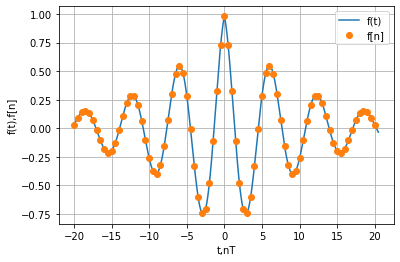

In [5]:
DT = 0.5
t = np.arange(-20,20+DT,DT)
t_cont = np.arange(-20,20+DT,0.01)

f = np.exp(-0.1*np.abs(t))*np.cos(np.sqrt(np.abs(t**2))+0.2)
f_cont = np.exp(-0.1*np.abs(t_cont))*np.cos(np.sqrt(np.abs(t_cont**2))+0.2)

plt.plot(t_cont,f_cont,label='f(t)')
plt.plot(t,f,'o',label='f[n]')
plt.grid()
plt.xlabel('t,nT')
plt.ylabel('f(t),f[n]')
plt.legend()
plt.show()

### The Discrete Time Fourier Transform (DTFT)
---

The Discrete Time Fourier Transform of a sampled signal $f[n]$ is given by
$$
F(\omega) = \sum_{n=-\infty}^{\infty}f[n] e^{-i\omega (n\Delta T)} = \sum_{n=-\infty}^{\infty}f[n] e^{-i\frac{\omega}{f_s} n} = \sum_{n=-\infty}^{\infty}f[n] e^{-i 2\pi\frac{\omega}{\omega_s} n}
$$
The spectrum is $f_s$-periodic in the frequency domain, i.e. $F(\omega) = F(\omega+\omega_s)$. To abbreviate we will mostly write
$$
F(\Omega)  = \sum_{n=-\infty}^{\infty}f[n] e^{-i \Omega n} 
$$
where
$$
\Omega = 2\pi\frac{\omega}{\omega_s}
$$
denotes the normalized frequency. Note that
$$
\omega \in \left[-\frac{\omega_s}{2},\frac{\omega_s}{2}\right]\quad \Leftrightarrow \quad
\Omega \in \left[-\pi,\pi\right]
$$
**Example**:  The DTFT of $f[n] = u[n]a^n$ (u denotes the unit-step function) is given by
$$
F(\Omega) = \sum_{n=0}^{\infty} (ae^{-i\Omega})^n = \frac{1}{1-ae^{-i\Omega}}\qquad |a|<1
$$
In the figure below we show the absolute value $|F(\Omega)|$ for $\Omega\in[-3\pi,3\pi]$.

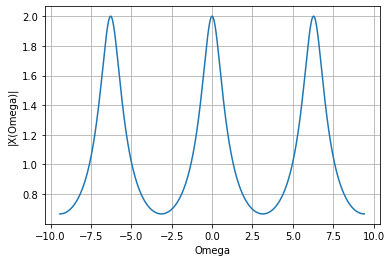

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.5
W = np.linspace(-3*np.pi,3*np.pi,1000)
X = 1/(1-a*np.exp(-1j*W))
plt.plot(W,np.abs(X))
plt.grid()
plt.xlabel('Omega')
plt.ylabel('|X(Omega)|')
plt.show()

### The $Z$-Transform and the $z$-Plane
---

The $z$-Transform for discrete times systems serves the same role as the Laplace transform on continuous time systems. Remember the Laplace transform
$$
F(s) = \int_0^{\infty}f(t)e^{-st}\mathrm{d}t\quad \quad s = \delta + i\omega
$$
For a discrete sequence $f[n] = f(n\Delta T)$ with $\Delta T=\frac{1}{f_s} = \frac{2\pi}{\omega_s}$ we obtain
$$
F(s) =  
\sum_{n=0}^{\infty}f[n]e^{-sn\Delta T} = 
\sum_{n=0}^{\infty}f[n]e^{-s\frac{2\pi}{\omega_s}n} = 
\sum_{n=0}^{\infty}f[n]e^{-(\delta+i\omega)\frac{2\pi}{\omega_s}n} = 
\sum_{n=0}^{\infty}f[n]\left(e^{\delta\frac{2\pi}{\omega_s}}e^{i 2\pi\frac{\omega}{\omega_s}}\right)^{-n}
$$
We define $z = \left(e^{\delta\frac{2\pi}{\omega_s}}e^{i 2\pi\frac{\omega}{\omega_s}}\right) = re^{i\Omega}$.
Hence, for the discrete, causal seris $x[n]$ the $Z$-transform is defined as
$$
F(z) = \sum_{n=0}^{\infty} f[n]z^{-n}\,.
$$

### Properties of the $Z$-Transform, Comparison of $s$-plane and $z$-plane
---
- We evaluate the $Z$-Transform of the shifted sequence $f[n-n_0]$ and obtain
$$
F(z) = \sum_{n=n_0}^{\infty}f[n-n_0]z^{-n} = \sum_{n=0}^{\infty}f[n]z^{-(n+n_0)} = 
z^{-n_0}\sum_{n=0}^{\infty}f[n]z^{-n}
$$
Hence, shifting a signal $n$ samples in the time domain leads to 
$$
z^{-n_0}F(z)
$$
in the frequency domain.

- We compare the $s$-plane and $z$-plane and note that ($\Omega = 2\pi \frac{\omega}{\omega_s}$)
    - $s=\delta + i \Omega$ is written in standard cartesian form for complex numbers
    - $z=re^{i\Omega}$ is written in polarform
- In the picture below we show that
    - The $i\Omega$-axis ($y$-axis) in the s plane (where $\delta=0$) is mapped to the unit circle in the $z$-plane (where $r=1$).
    - There are repeated stripes of width $2\pi$ (twice the Nyquist frequency) along the $i\Omega$-axis. 
    - (Each strip on) the left hand side of the $s$-plane (where $\delta < 0$) is mapped to inner of the unit circle on the $z$-plane (where $r<1$).
    
 
<img src="s_and_z_plane.jpeg" height="100" width="600"/>

### Description of Discrete Time Systems
---
Similar to the the linear ODE describing a continuous time LTI system, a dicrete linear time is discribed by the following difference equation:
$$
a_ny[n] + a_{n-1}y[n-1] + \ldots + a_{n-N}y[n-N] = b_nx[n] + b_{n-1}x[n-1] + \ldots + b_{n-M}x[n-M].
$$
Rewriting we obtain
$$
a_ny[n]  = \sum_{k=0}^M b_{n-k}x[n-k] - \sum_{k=1}^N a_{n-k}y[n-k]
$$
Subsequently we will distinguish three cases:
- **Moving average/all-zero filter**: If the difference equation has the form 
$$
a_ny[n]  = \sum_{k=0}^M b_{n-k}x[n-k]\, , 
$$
i.e. $y[n]$ is given by the inputs only, the system is called a (non recursive) moving average filter. It is also known (the transfer function - see below - has only zeros) as an all-zero filter. This filter has a finite-impulse-respone (FIR).
- **Auto-regessive/all-pole filter** If the difference equation takes the form 
$$
a_ny[n]  = b_nx[n]- \sum_{k=1}^N a_{n-k}y[n-k]\, , 
$$
i.e. $y[n]$ is given by the current input $x[n]$ and recursive on the outputs $y[n-k]$, the systems is called 
an auto-regressive filter. It is also known (the transfer function - see below - has only poles) as an all-pole filter. This filter has an infinite-impulse-respone (IIR).
- **Auto-regessive moving average filter** With the full difference equation
$$
a_ny[n]  = \sum_{k=0}^M b_{n-k}x[n-k] - \sum_{k=1}^N a_{n-k}y[n-k]
$$
the filter is known as an auto-regessive moving average filter. It has as well an infinite-impulse-respone (IIR).

### Stability of a Discrete Time System
---
Remember the continuous case: If all poles $p_i$ are on the left hand side of the $s$-plane, i.e. $\delta_i < 0$ for all $p_i=\delta_i+i\Omega_i$ the system was BIBO-stable.

In the discrete case (as the left hand side hide of the $s$-plane is mapped to the interior of the $z$-plane) we obtain the following rule: If all poles reside within the unit circle, i.e. $r_i<1$ for all $p_i=r_ie^{i\Omega_i}$, the system is BIBO-stable.

###  Transfer Function and Frequency Response
---
#### Transfer Function

With the help of the shifting property the **transfer function** of a system descibed by the difference equation is easy obtained and given by
$$
H(z) = \frac{b_n + b_{n-1}z^{-1}+\ldots + b_{n-M}z^{-N}}{a_n + a_{n-1}z^{-1}+\ldots + a_{n-N}z^{-N}}
$$
**Note**: The transfer function $H(z)$ describes the difference equation and hence the system completely (and vice versa).
#### Frequency Response
The **frequency response** of that system is obtaind by evaluation the transfer function on the unit circle 
$$
H(e^{i\Omega}) = \frac{b_n + b_{n-1}(e^{-i\Omega})+\ldots + b_{n-M}(e^{-i\Omega M})}{a_n + a_{n-1}(e^{-i\Omega})+\ldots + a_{n-N}(e^{-i\Omega N})}
$$

**Example**: We consider the difference equation $y[n] = \frac{1}{4}y[n-2]+3x[n]-3x[n-1]$. The transfer function
of that system is calculated as
$$
H(z) = \frac{3(1-\frac{1}{z})}{1-\frac{1}{4}\frac{1}{z^2}} = \frac{3z(z-1)}{z^2-\frac{1}{4}}
$$

### Introduction to Scipy dlti
---
The procedure to setup a discrete time system is (apart from one exeption) the same as setting up a continuous time LTI system. There are two ways of setting up such a system

- directly from `scipy.signal.dlti()`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.html
- use either 
    - `scipy.signal.TransferFunction()` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html#scipy.signal.TransferFunction) or 
    - `scipy.signal.ZerosPolesGain()` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ZerosPolesGain.html#scipy.signal.ZerosPolesGain) 
**with dt=True**

Note: When using TransferFunction to setup the LTI system, the transfer function has to cast into the following form
$$
H(z) = \frac{\beta_0z^M+\beta_1z^{M-1}+\ldots + \beta_{M}}{\alpha_0z^N+\alpha_1z^{N-1}+\ldots + \alpha_{N}}
$$

**Example 1**: We consider a 4-Point moving average filter
$$
y[n] = \frac{1}{4}\left[x[n]+x[n-1]+x[n-2]+x[n-3]\right]
$$
and will simulate the ouput of that system to a given input.

$$
\frac{\frac{1}{4}+\frac{1}{4}z^{-1}+\frac{1}{4}z^{-2}+\frac{1}{4}z^{-3}}{1} = 
\frac{\frac{1}{4}z^3+\frac{1}{4}z^2+\frac{1}{4}z+\frac{1}{4}}{z^3}
$$

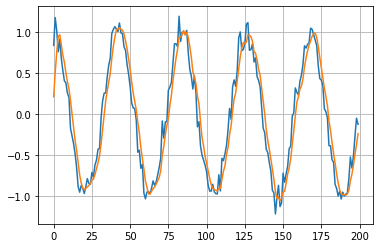

In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
N = 4

a = [1/N for i in range(N)]
b = [0 for i in range(N)]
b[0] = 1
sys_ma = signal.TransferFunction(a,b,dt=True)

# Generate an input signal with noise
f_s = 20
w_s = 2*np.pi*f_s
t = np.arange(0,10,1/f_s) 
x = np.cos(3*t)+ 0.1*np.random.randn(t.size)
plt.plot(x)

t, y = signal.dlsim(sys_ma,x)
plt.plot(y)
plt.grid()

We generate the impulse respone of the system

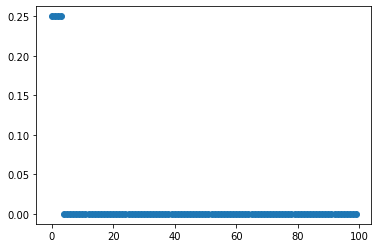

In [10]:
t, h = signal.dimpulse(sys_ma)
plt.plot(h[0],'o')

**Example 2**: We consider the two systems with transfer functions $H_1(z)$ (stable) and $H_2(z)$ (unstable)
$$
H_1(z) = \frac{\frac{1}{z}}{1+0.9\frac{1}{z}} = \frac{1}{z+0.9}\qquad \quad 
H_2(z)=\frac{\frac{1}{z}}{1+1.1\frac{1}{z}} = \frac{1}{z+1.1}
$$
with corresponding difference equation
$$
\mathrm{System 1:}\quad  y[n]+0.9y[n-1] = x[n-1]\qquad 
\mathrm{System 2:}\quad  y[n]+1.1y[n-1] = x[n-1]
$$
and evaluate the discrete impulse response $h[n]$.

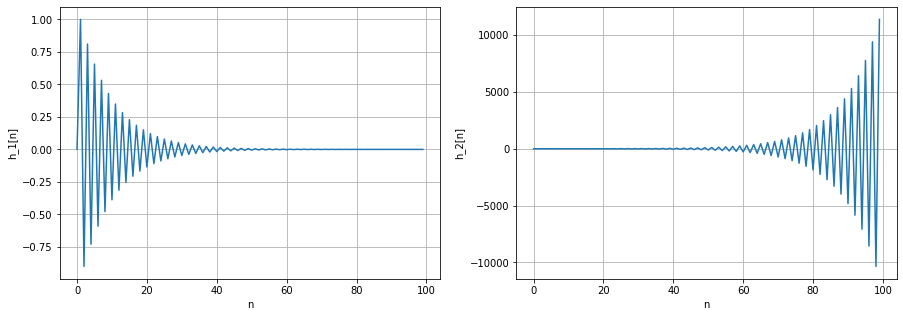

In [20]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


sys1 = signal.ZerosPolesGain([],[-0.9],1,dt=True)
sys2 = signal.ZerosPolesGain([],[-1.1],1,dt=True)

t1,h1 = signal.dimpulse(sys1)
t2,h2 = signal.dimpulse(sys2)
h1 = np.squeeze(h1)
h2 = np.squeeze(h2)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(t1,h1)
plt.xlabel('n')
plt.ylabel('h_1[n]')
plt.grid()
plt.subplot(1,2,2)
plt.plot(t2,h2)
plt.xlabel('n')
plt.ylabel('h_2[n]')
plt.grid()
plt.show()

- Use `scipy.signal.dfreqresp()` and `scipy.signal.dbode()` to find the Bodeplot/frequency response of System 1:

In [23]:
sys1

ZerosPolesGainDiscrete(
array([], dtype=float64),
array([-0.9]),
1,
dt: True
)

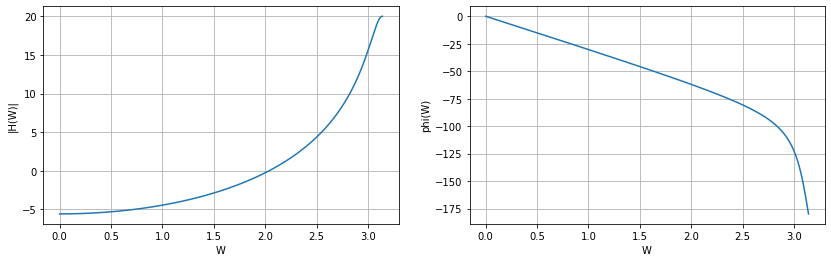

In [47]:
# We use signal.dfreqresp()
w,H = signal.dfreqresp(sys1)
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(w,20*np.log10(np.abs(H)))
plt.xlabel('W')
plt.ylabel('|H(W)|')
plt.grid()
plt.subplot(1,2,2)
plt.plot(w,np.rad2deg(np.unwrap(np.angle(H))))
plt.xlabel('W')
plt.ylabel('phi(W)')
plt.grid()

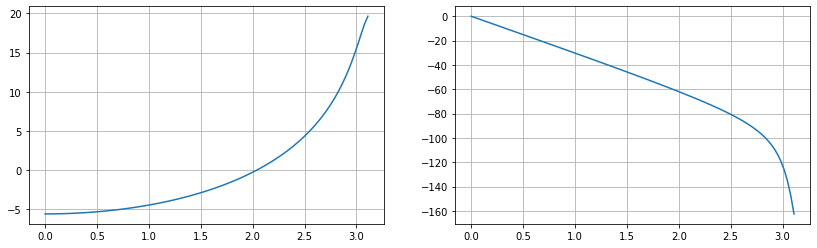

In [50]:
# We use signal.dbode()
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
w,H,phi = signal.dbode(sys1)
plt.plot(w,H)
plt.grid()
plt.subplot(1,2,2)
plt.plot(w,phi)
plt.grid()